In [18]:
##############################################################################################
############BIOM/SYSC 5405, Pattern Classificaiton and Experimental Design####################
############################## Project 5405## ################################################
################################### TUHEEN AHMMED, Nov 29, 2021 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

import pandas as pd
import csv
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# max rows and columns##
pd.set_option('display.max_rows', None)

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#confusion matrix#
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#######ROC########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

#####P-R curve ####

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

########## plotpy #######
import plotly_express as px
import plotly.graph_objects as go


In [19]:
###### (a)data visualization########## 
##load data, read a csv file, last two labels KIBA and label
## if kiba > 12.1 label = TRUE 
## if kiba < 12.1 label = FALSE

drug = pd.read_csv("train_data_original.csv")

In [20]:
##### 109479 rows and 338 columns
##### actual class last two columns; Kiba nad label 
##### datatypes, all are float64, KIBA=float64, Label=bool

drug.shape
drug.head()
drug.tail()

#data inspection after csv file importing 
drug.dtypes
drug.head()

G26  G26_Target Sequence_in_SMILES_perc  \
0  5.073946                            0.954991   
1  6.826617                            0.001154   
2  5.177106                            0.818811   
3  5.179001                            0.183497   
4  5.822746                            0.029429   

   G26_SMILES_in_Target Sequence_perc      G26_ARRO  G26_SMILES_base  \
0                            0.062554     16.739510         5.522422   
1                            0.014306  60569.338400         5.590014   
2                            0.930755      1.312142         5.556566   
3                            0.970300      5.616494         5.258327   
4                            0.326915    103.942684         5.621003   

   G26_SMILES_base_perc  G26_Target Sequence_base  \
0              0.105597                  5.062549   
1              0.091748                  6.158633   
2              0.128679                  5.564309   
3              0.130410                  5.683928   
4              0.101558                  5.896788   

   G26_Target Sequence_base_perc  G26_fdp_SMILES_base  \
0                       0.098782            -0.849394   
1                       0.126360             0.090594   
2                       0.099924            -0.690133   
3                       0.086053            -0.053087   
4                       0.281712             0.072129   

   G26_fdp_Target Sequence_base  ...  G10_Target Sequence_base  \
0                      0.036227  ...                  5.645625   
1                      0.112054  ...                  5.589494   
2                     -0.830831  ...                  5.549520   
3                     -0.884247  ...                  5.784208   
4                     -0.045202  ...                  5.631512   

   G10_Target Sequence_base_perc  G10_fdp_SMILES_base  \
0                       0.120050            -0.024235   
1                       0.122443            -0.261973   
2                       0.117385            -0.346797   
3                       0.118799             0.045586   
4                       0.120159            -0.181766   

   G10_fdp_Target Sequence_base  G10_fd_SMILES_base  \
0                     -0.640176           -0.004603   
1                     -0.644310           -0.019836   
2                     -0.768549           -0.024956   
3                     -0.755603            0.018378   
4                     -0.524913           -0.015458   

   G10_fd_Target Sequence_base  G10_std_SMILES_dist  \
0                    -0.058854             0.538344   
1                    -0.060652             0.032666   
2                    -0.071758            -0.112331   
3                    -0.067145             1.285098   
4                    -0.051385             0.119600   

   G10_std_Target Sequence_dist       KIBA  Label  
0                     -0.688681  11.900001  False  
1                     -0.720316  11.699999  False  
2                     -1.020784  11.300000  False  
3                     -0.965758  11.800001  False  
4                     -0.458659  11.600000  False  

[5 rows x 338 columns]

In [21]:
#############################################################################################################
####################### Stratified Train-Test Splits for classification, 80/20 (train/test split)############
#############################################################################################################

from sklearn.model_selection import train_test_split

X= drug.drop(columns= ['KIBA' , 'Label'])
y= drug['Label']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
# summarize first 5 rows
#print(X_train)
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
# summarize first 5 rows
#print(X_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(109479, 336) (109479,)
(87583, 336) (87583,) (21896, 336) (21896,)


In [22]:
columns = drug.columns.array
columns

<PandasArray>
[                               'G26', 'G26_Target Sequence_in_SMILES_perc',
 'G26_SMILES_in_Target Sequence_perc',                           'G26_ARRO',
                    'G26_SMILES_base',               'G26_SMILES_base_perc',
           'G26_Target Sequence_base',      'G26_Target Sequence_base_perc',
                'G26_fdp_SMILES_base',       'G26_fdp_Target Sequence_base',
 ...
           'G10_Target Sequence_base',      'G10_Target Sequence_base_perc',
                'G10_fdp_SMILES_base',       'G10_fdp_Target Sequence_base',
                 'G10_fd_SMILES_base',        'G10_fd_Target Sequence_base',
                'G10_std_SMILES_dist',       'G10_std_Target Sequence_dist',
                               'KIBA',                              'Label']
Length: 338, dtype: object

In [23]:
from sklearn.ensemble import IsolationForest

#iso = IsolationForest(contamination=0.1)
#yhat = iso.fit_predict(X_train)
#yhat.shape

In [24]:
X_train.shape

(87583, 336)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87583, 336)
(21896, 336)
(87583,)
(21896,)


In [26]:
#X_train, X_test, y_train, y_test 
####### train-test split -- 80/20 #######
#ratio = 3.72
# 86324/23155 =3.72
# 69059/18524 =3.72
#17265/4631 = 3.72

print('Dataset: Class0(False)=%d, Class1(True)=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0(False)=%d, Class1(True)=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0(False)=%d, Class1(True)=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Dataset: Class0(False)=86324, Class1(True)=23155
Train: Class0(False)=69059, Class1(True)=18524
Test: Class0(False)=17265, Class1(True)=4631


In [27]:
##########################################################
##############  Linear Discriminant Analysis #############
##########################################################
# evaluate a lda model on the dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


model_336 = LinearDiscriminantAnalysis(n_components= None)
model_336.fit(X_train, y_train)
X_train = model_336.fit_transform(X_train, y_train)
X_test = model_336.transform(X_test)


scores_final = cross_val_score(model_336, X_train, y_train, scoring='accuracy')
# summarize result
print('Accuracy_train with std: %.3f (%.3f)' % (mean(scores_final), std(scores_final)))


scores_final_test = cross_val_score(model_336, X_test, y_test, scoring='accuracy')
# summarize result
print('Accuracy_test with std: %.3f (%.3f)' % (mean(scores_final_test), std(scores_final_test)))

Accuracy_train with std: 0.811 (0.002)
Accuracy_test with std: 0.807 (0.003)


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


lda_final = LinearDiscriminantAnalysis(n_components= 1)
X_lda = lda_final.fit(X_train, y_train)
y_pred_lda = X_lda.predict(X_test)

# calculate and print model accuracy
print("LDA Model Accuracy test set:", accuracy_score(y_test, y_pred_lda))


scores_final = cross_val_score(lda_final, X_train, y_train, scoring='accuracy')
# summarize result
print('Accuracy_train: %.3f (%.3f)' % (mean(scores_final), std(scores_final)))


scores_final_test = cross_val_score(lda_final, X_test, y_test, scoring='accuracy')
# summarize result
print('Accuracy_test: %.3f (%.3f)' % (mean(scores_final_test), std(scores_final_test)))

LDA Model Accuracy test set: 0.8082298136645962
Accuracy_train: 0.811 (0.002)
Accuracy_test: 0.807 (0.003)


accuracy for each fold with 336 featurs:: [0.81155449 0.81138323 0.81206828 0.80731902 0.81063028]
0.810591 accuracy with a standard deviation of 0.001700


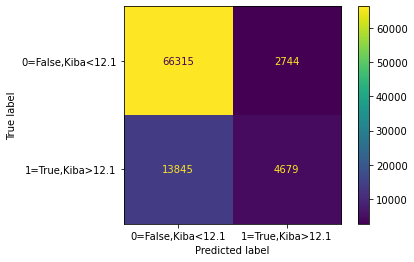

In [29]:
############################################################################
####################### confusion matrix with 5-fold CV#####################
############################################################################

y_pred_336 = cross_val_predict(model_336, X_train, y_train)
confusion_matrix_336 = confusion_matrix(y_train, y_pred_336)
cm_display_336 = ConfusionMatrixDisplay(confusion_matrix_336, display_labels=["0=False,Kiba<12.1", "1=True,Kiba>12.1"] ).plot()

#print(confusion_matrix_315)
scores_336 = cross_val_score(model_336, X_train, y_train, scoring = "accuracy")
print("accuracy for each fold with 336 featurs::", scores_336)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336.mean(), scores_336.std()))



accuracy for each fold with 21 featurs:: [0.80753425 0.81251427 0.80223795 0.80589176 0.80840375]
0.807316 accuracy with a standard deviation of 0.003349


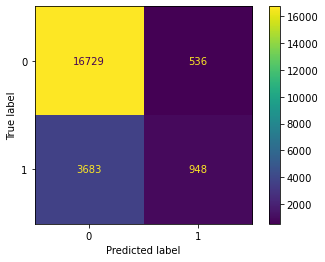

In [30]:
#### confusion matrix with test data, 21 best features #####

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

#model_21 = LinearDiscriminantAnalysis(n_components= None)
#model_21.fit(best_features_selected, y_train)
#X_train = model_21.fit_transform(best_features_selected, y_train)
#X_test = model_21.transform(best_features_selected_test)

y_pred_336_test = cross_val_predict(model_336, X_test, y_test, cv =5)
confusion_matrix_336_test = confusion_matrix(y_test, y_pred_336_test)
cm_display_336_test = ConfusionMatrixDisplay(confusion_matrix_336_test).plot()

#print(confusion_matrix_315)

scores_336_test = cross_val_score(model_336, X_test, y_test, scoring = "accuracy")
print("accuracy for each fold with 21 featurs::", scores_336_test)
print("%0.6f accuracy with a standard deviation of %0.6f" % (scores_336_test.mean(), scores_336_test.std()))
#print(best_features_selected_test)
#best_features_selected_test.shape

In [31]:
###################Performance matrics######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_train, y_pred_336))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_train, y_pred_336))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_train, y_pred_336, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_train, y_pred_336, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_train, y_pred_336))

TN = 66315
TP = 2744
FP = 3057
FN = 13845

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[66315  2744]
 [13845  4679]]
accuracy:: 0.8105910964456573
precision:: [0.82728293 0.63033814]
sensitivity/recall:: [0.96026586 0.25259123]


              precision    recall  f1-score   support

       False       0.83      0.96      0.89     69059
        True       0.63      0.25      0.36     18524

    accuracy                           0.81     87583
   macro avg       0.73      0.61      0.62     87583
weighted avg       0.79      0.81      0.78     87583

sensitivity/TPR:: 0.16541081439508107
specificity/TNR:: 0.9559332295450614
precison/ PPV:: 0.4730218927771074
NPV:: 0.8272829341317365


In [32]:
###################Performance matrics, test data######################
################### LDA###############s model############### 
############5-fold cross validation with 336 features#######
############Confusion Matrix with 336 features##############

from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix::", confusion_matrix(y_test, y_pred_336_test))

# Accuracy
from sklearn.metrics import accuracy_score
print("accuracy::", accuracy_score(y_test, y_pred_336_test))

# precision or positive predictive value (PPV)
from sklearn.metrics import precision_score
print("precision::", precision_score(y_test, y_pred_336_test, average=None))

# Sensitivity/Recall/hit rate/TPR
from sklearn.metrics import recall_score
print("sensitivity/recall::",recall_score(y_test, y_pred_336_test, average=None))
print("")
print("")
#Classification Rreport
print(classification_report(y_test, y_pred_336_test))

TN = 16729
TP = 948
FP = 536
FN = 3683

#sensitivity, recall, hit rate, or true positive rate (TPR)
sensitivity  = TP / (TP+FN)
print("sensitivity/TPR::", sensitivity)

#specificity, selectivity or true negative rate (TNR)
specificity = TN/(TN+FP)
print("specificity/TNR::", specificity)

#precision or positive predictive value (PPV)
positive_pred_value = TP/ (TP+FP)
print("precison/ PPV::", positive_pred_value)

#negative predictive value (NPV)
negative_pred_value = TN/ (TN+FN)
print("NPV::", negative_pred_value)

confusion matrix:: [[16729   536]
 [ 3683   948]]
accuracy:: 0.8073164048227987
precision:: [0.81956692 0.63881402]
sensitivity/recall:: [0.96895453 0.20470741]


              precision    recall  f1-score   support

       False       0.82      0.97      0.89     17265
        True       0.64      0.20      0.31      4631

    accuracy                           0.81     21896
   macro avg       0.73      0.59      0.60     21896
weighted avg       0.78      0.81      0.77     21896

sensitivity/TPR:: 0.20470740660764414
specificity/TNR:: 0.9689545322907617
precison/ PPV:: 0.6388140161725068
NPV:: 0.8195669214187733


Linear Discriminant Analysis PR AUC: 0.482


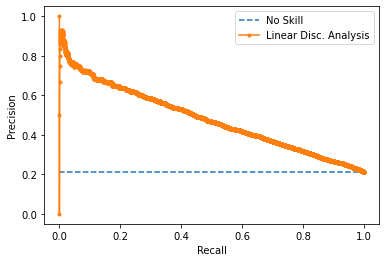

              x         y
0      1.000000  0.211500
1      0.999784  0.211464
2      0.999784  0.211473
3      0.999784  0.211483
4      0.999784  0.211493
5      0.999784  0.211502
6      0.999784  0.211512
7      0.999784  0.211522
8      0.999784  0.211531
9      0.999784  0.211541
10     0.999784  0.211551
11     0.999784  0.211560
12     0.999784  0.211570
13     0.999784  0.211580
14     0.999784  0.211589
15     0.999784  0.211599
16     0.999784  0.211609
17     0.999784  0.211618
18     0.999784  0.211628
19     0.999784  0.211638
20     0.999784  0.211647
21     0.999784  0.211657
22     0.999784  0.211667
23     0.999784  0.211676
24     0.999784  0.211686
25     0.999784  0.211696
26     0.999784  0.211706
27     0.999784  0.211715
28     0.999784  0.211725
29     0.999784  0.211735
30     0.999784  0.211744
31     0.999784  0.211754
32     0.999784  0.211764
33     0.999784  0.211773
34     0.999784  0.211783
35     0.999784  0.211793
36     0.999784  0.211802
37     0.999

In [33]:
#############################################################
###########Precision-recall curve with 336 features--modified##########
#A no-skill classifier is one that cannot discriminate between the classes and would predict a random class
#or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. 
#It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
#############################################################


#model_336 = LinearDiscriminantAnalysis(n_components= None)
#model_336.fit(X_train, y_train)
#X_train = model_336.fit_transform(X_train, y_train)
#X_test = model_336.transform(X_test)


#model_336_pr = LinearDiscriminantAnalysis()
#model_336_pr.fit(X_train, y_train)
#y_pred_336_pr = cross_val_predict(model_336_pr, X_train, y_train, cv = 7)

#display = PrecisionRecallDisplay.from_predictions(y_train, y_pred_336_pr, name="LDA, 5-fold CV")
#_ = display.ax_.set_title("Precision-Recall curve # 336 features")


# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(y_test[y_test==1]) / len(y_test)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Linear Disc. Analysis')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    

model_336_pr = LinearDiscriminantAnalysis(n_components= None)
model_336_pr_final = model_336_pr.fit(X_train, y_train)
yhat = model_336_pr_final.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Linear Discriminant Analysis PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)


df = pd.DataFrame(dict(x = recall,y = precision))
df.to_csv('lda.csv')
print(df)
fig = px.line(df, x='x', y='y', title='Precision Recall Curve, LDA')
fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))




In [43]:
print(X_test.shape)
print(X_train.shape)
print(X.shape)

(21896, 1)
(87583, 1)
(109479, 336)


In [35]:
stdev_336 = pd.read_csv("lda.csv")
import statistics
statistics.stdev(stdev_336.y)

In [36]:
stdev_336 


Unnamed: 0         x         y
0               0  1.000000  0.211500
1               1  0.999784  0.211464
2               2  0.999784  0.211473
3               3  0.999784  0.211483
4               4  0.999784  0.211493
5               5  0.999784  0.211502
6               6  0.999784  0.211512
7               7  0.999784  0.211522
8               8  0.999784  0.211531
9               9  0.999784  0.211541
10             10  0.999784  0.211551
11             11  0.999784  0.211560
12             12  0.999784  0.211570
13             13  0.999784  0.211580
14             14  0.999784  0.211589
15             15  0.999784  0.211599
16             16  0.999784  0.211609
17             17  0.999784  0.211618
18             18  0.999784  0.211628
19             19  0.999784  0.211638
20             20  0.999784  0.211647
21             21  0.999784  0.211657
22             22  0.999784  0.211667
23             23  0.999784  0.211676
24             24  0.999784  0.211686
25             25  0.999784  0.211696
26             26  0.999784  0.211706
27             27  0.999784  0.211715
28             28  0.999784  0.211725
29             29  0.999784  0.211735
30             30  0.999784  0.211744
31             31  0.999784  0.211754
32             32  0.999784  0.211764
33             33  0.999784  0.211773
34             34  0.999784  0.211783
35             35  0.999784  0.211793
36             36  0.999784  0.211802
37             37  0.999784  0.211812
38             38  0.999784  0.211822
39             39  0.999784  0.211831
40             40  0.999784  0.211841
41             41  0.999784  0.211851
42             42  0.999784  0.211861
43             43  0.999784  0.211870
44             44  0.999784  0.211880
45             45  0.999784  0.211890
46             46  0.999784  0.211899
47             47  0.999784  0.211909
48             48  0.999784  0.211919
49             49  0.999784  0.211928
50             50  0.999784  0.211938
51             51  0.999784  0.211948
52             52  0.999784  0.211958
53             53  0.999784  0.211967
54             54  0.999784  0.211977
55             55  0.999784  0.211987
56             56  0.999784  0.211996
57             57  0.999784  0.212006
58             58  0.999784  0.212016
59             59  0.999784  0.212025
60             60  0.999784  0.212035
61             61  0.999784  0.212045
62             62  0.999784  0.212055
63             63  0.999784  0.212064
64             64  0.999784  0.212074
65             65  0.999784  0.212084
66             66  0.999784  0.212093
67             67  0.999568  0.212057
68             68  0.999568  0.212067
69             69  0.999568  0.212077
70             70  0.999568  0.212087
71             71  0.999568  0.212096
72             72  0.999568  0.212106
73             73  0.999568  0.212116
74             74  0.999568  0.212125
75             75  0.999568  0.212135
76             76  0.999568  0.212145
77             77  0.999568  0.212155
78             78  0.999568  0.212164
79             79  0.999568  0.212174
80             80  0.999568  0.212184
81             81  0.999568  0.212193
82             82  0.999568  0.212203
83             83  0.999568  0.212213
84             84  0.999568  0.212223
85             85  0.999352  0.212187
86             86  0.999352  0.212196
87             87  0.999352  0.212206
88             88  0.999352  0.212216
89             89  0.999352  0.212225
90             90  0.999352  0.212235
91             91  0.999352  0.212245
92             92  0.999352  0.212255
93             93  0.999352  0.212264
94             94  0.999352  0.212274
95             95  0.999352  0.212284
96             96  0.999352  0.212294
97             97  0.999352  0.212303
98             98  0.999352  0.212313
99             99  0.999352  0.212323
100           100  0.999352  0.212333
101           101  0.999352  0.212342
102           102  0.999352  0.212352
103           103  0.999352  0.212362
104           104

In [39]:
import statistics
statistics.stdev(stdev_336.y)

0.14252608435513378

In [40]:
print(stdev_336.y)

0        0.211500
1        0.211464
2        0.211473
3        0.211483
4        0.211493
5        0.211502
6        0.211512
7        0.211522
8        0.211531
9        0.211541
10       0.211551
11       0.211560
12       0.211570
13       0.211580
14       0.211589
15       0.211599
16       0.211609
17       0.211618
18       0.211628
19       0.211638
20       0.211647
21       0.211657
22       0.211667
23       0.211676
24       0.211686
25       0.211696
26       0.211706
27       0.211715
28       0.211725
29       0.211735
30       0.211744
31       0.211754
32       0.211764
33       0.211773
34       0.211783
35       0.211793
36       0.211802
37       0.211812
38       0.211822
39       0.211831
40       0.211841
41       0.211851
42       0.211861
43       0.211870
44       0.211880
45       0.211890
46       0.211899
47       0.211909
48       0.211919
49       0.211928
50       0.211938
51       0.211948
52       0.211958
53       0.211967
54       0.211977
55       0